<a href="https://colab.research.google.com/github/chavamoon/MachineLearningExamples/blob/main/Dimmensionality_reduction_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

In [4]:
np.random.seed(7463)
n = 1000

In [5]:
# función para hacer el pca, mostrando el porcentaje de varianza explicadas y con normalización opcional
from sklearn.preprocessing import StandardScaler

def pca_fun(x=pd.DataFrame(), n_components=1, normalize=False):

  pca = PCA(n_components=n_components)

  if normalize:
    x_cols= x.columns
    std_scale = StandardScaler().fit(x)
    x = pd.DataFrame(std_scale.transform(x), columns=x_cols)

  principal_components = pca.fit_transform(x)
  pc_names = ['pc_{}'.format(a+1) for a in range(n_components)]
  principal_df = pd.DataFrame(data = principal_components
             , columns = pc_names)

  finalDf = pd.concat([principal_df, x], axis = 1)
  print('Explained Variance: ', pca.explained_variance_ratio_)
  print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
  sns.pairplot(finalDf)

In [6]:
#funcion que regresa distribuciones multivariadas
def cor_data(mu=[0,0,0], sigma=np.eye(3), n=1000, seed=7463):
  np.random.seed(seed)
  x_names = ["x{}".format(a+1) for a in range(len(mu))]
  x = np.random.multivariate_normal(mu, sigma, n)
  x = pd.DataFrame(x, columns=x_names)
  print('Matriz de Correlacion')
  print(x.corr(), '\n')
  return x

### PCA cuando dos variables están relacionadas a través de una tercera

x1 y x2 dependen de c1 y se realizará el PCA con un componente para observar la varianza explicada por el componente.

Explained Variance:  [0.97779157]
Sum of Explained Variance:  0.9777915714597009
Principal Components [[ 0.32379223 -0.94612821]]


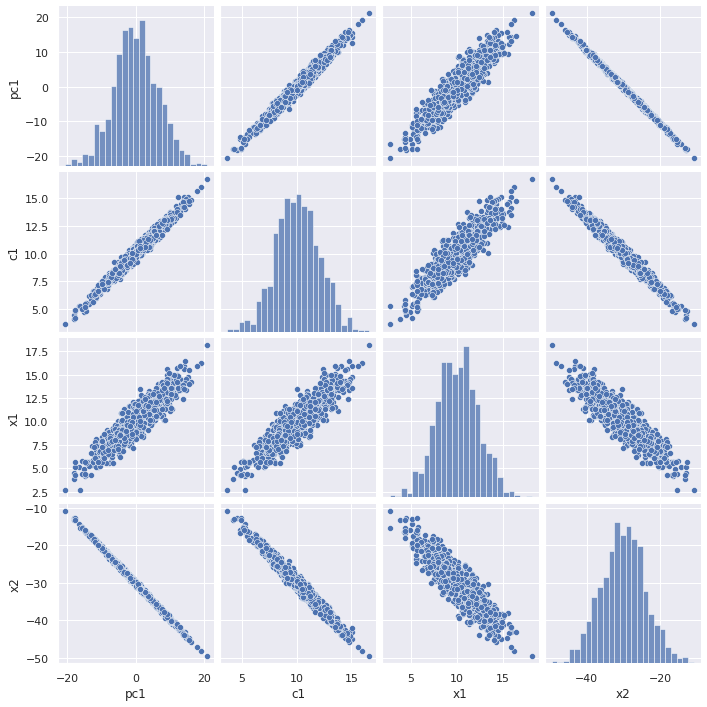

In [7]:
c1 = np.random.normal(10,2,n)

x1 = c1+np.random.normal(0,1,n)
x2 = -3*c1+ np.random.normal(0,1,n)

X = pd.DataFrame({'x1': x1, 'x2': x2})
c_df = pd.DataFrame({'c1':c1})

# PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components, columns=['pc1'])

#variances
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
print('Principal Components',  pca.components_)

#ploting pc1 correlation
sns.pairplot(pd.concat([principal_df, c_df, X ], axis = 1))

La varianza explicada para el primer componente es de 0.97, un segundo componente solo explicaría el 3% restante.

La varianza es así de grande porque x1 y x2 tienen una relación lineal a través de c1, pueto que ambas modifican c1.

Esto indica una buena respesta al reducir de 2 dimensiones a 1.
Podemos observar que pc1 está relacionado positivamente con x1 y c1, y de manera negativa con x2.
 

### PCA con tres variables, dos relacionadas y otra no

#### La tercer variable es pequeña comparada a las otras 

Explained Variance:  [0.9555074]
Sum of Explained Variance:  0.9555074011749376
Principal Components [[ 0.32378742 -0.94610869  0.00632876]]


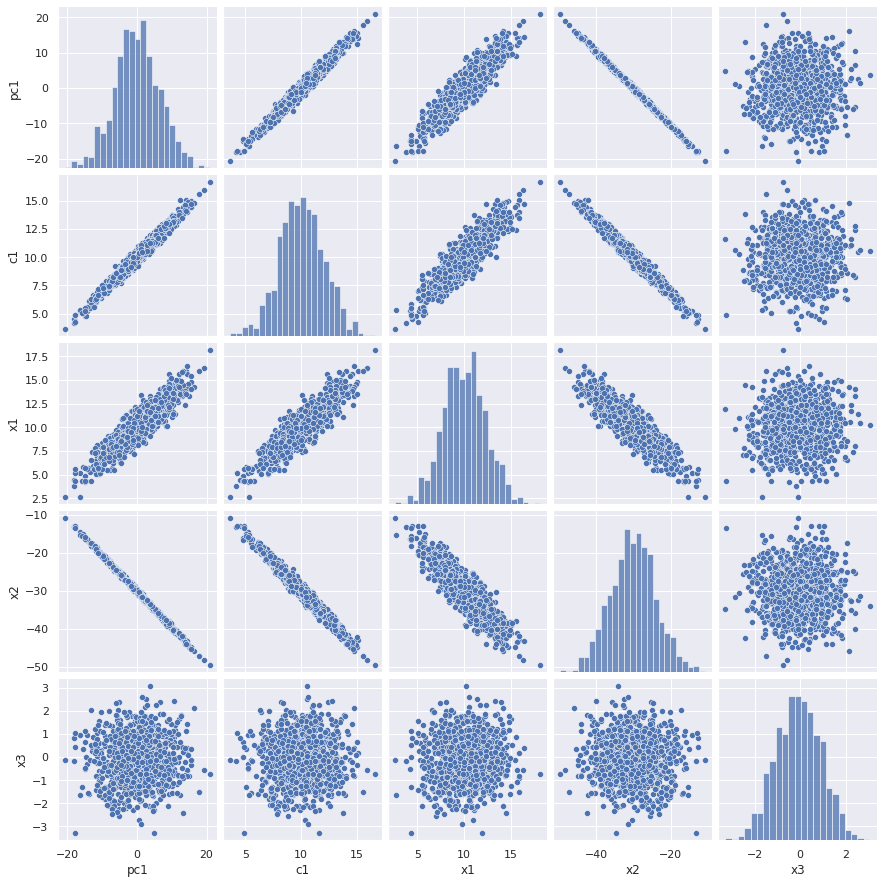

In [8]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

c1 = np.random.normal(10,2,n)

x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(0,1,n)
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
c = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['pc1'])

print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
print('Principal Components', pca.components_)
sns.pairplot(pd.concat([principal_df, c, x], axis = 1))

Con esta variable adicional el primer componente explica el 95% de la varianza, menos que en el experimento anterior, pero sigue teniendo un valor alto.

x3 no influye debido a que la varianza predominante son las de x1 y x2, además de que x1 y x2 se encuentran relacionadas directamente

#### La varianza de la tercer variable aumenta 

Explained Variance:  [0.70106079]
Sum of Explained Variance:  0.7010607898182198
Principal Components [[-0.01544958  0.04157561 -0.99901591]]


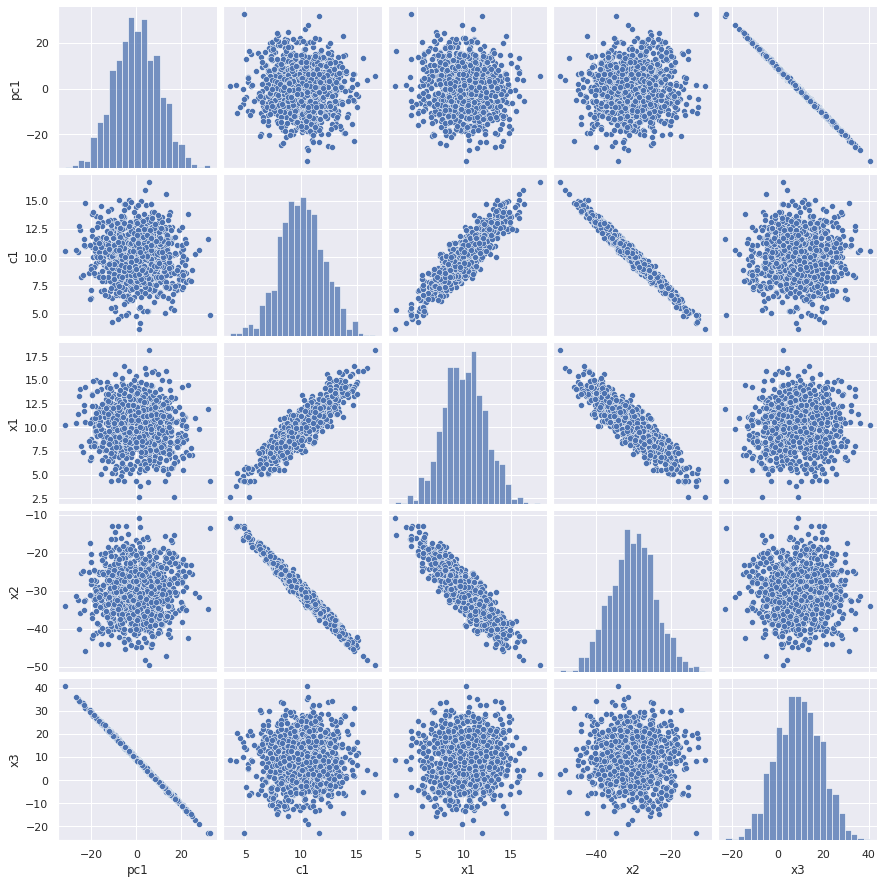

In [9]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

c1 = np.random.normal(10,2,n)

x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
c = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['pc1'])

print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
print('Principal Components', pca.components_)
sns.pairplot(pd.concat([principal_df, c, x], axis = 1))

Al aumentar la varianza de x3 nos damos cuenta que ahora el primer componente está intimamente relacionado con x3 y no con x1 ni con x2.

#### Aumentamos el número de componentes en el PCA

Explained Variance:  [0.70106079 0.2922833 ]
Sum of Explained Variance:  0.9933440938140239
Principal Components [[-0.01544958  0.04157561 -0.99901591]
 [ 0.32335585 -0.94523813 -0.0443382 ]]


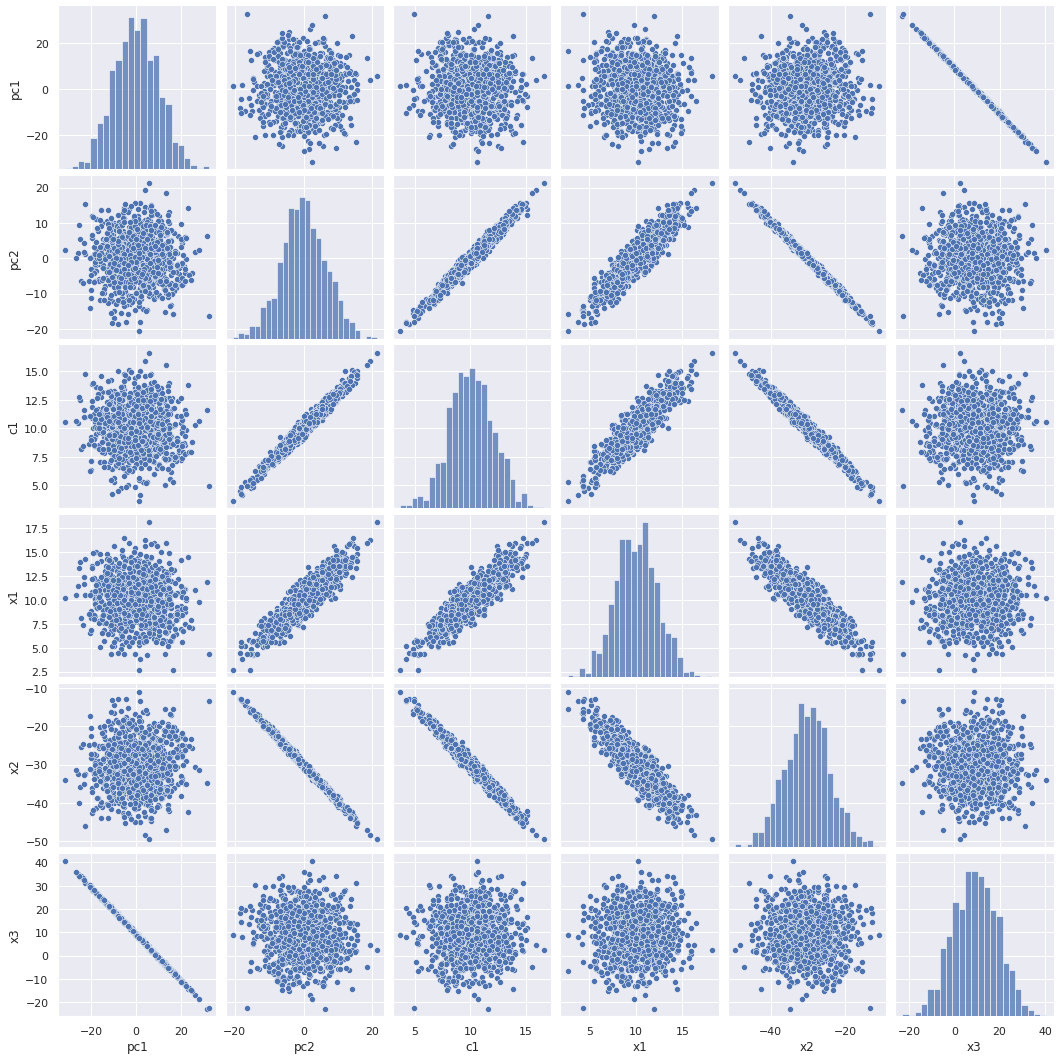

In [10]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

c1 = np.random.normal(10,2,n)

x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
c = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['pc1', 'pc2'])

print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
print('Principal Components', pca.components_)
sns.pairplot(pd.concat([principal_df, c, x], axis = 1))

La suma de los primeros componentes explican el 99% de la varianza.
El primer componente se relaciona con x3 y el segundo com x1 y x2
El análisis indica que la reducción a dos dimensiones contiene más información que la proyección a una dimensión.

### PCA con tres variables, dos relacionadas y otra no, pero todas normalizadas

Ahora las tres variables se normalizan antes de pasar al PCA

Explained Variance:  [0.63228004 0.33212598]
Sum of Explained Variance:  0.96440602146757


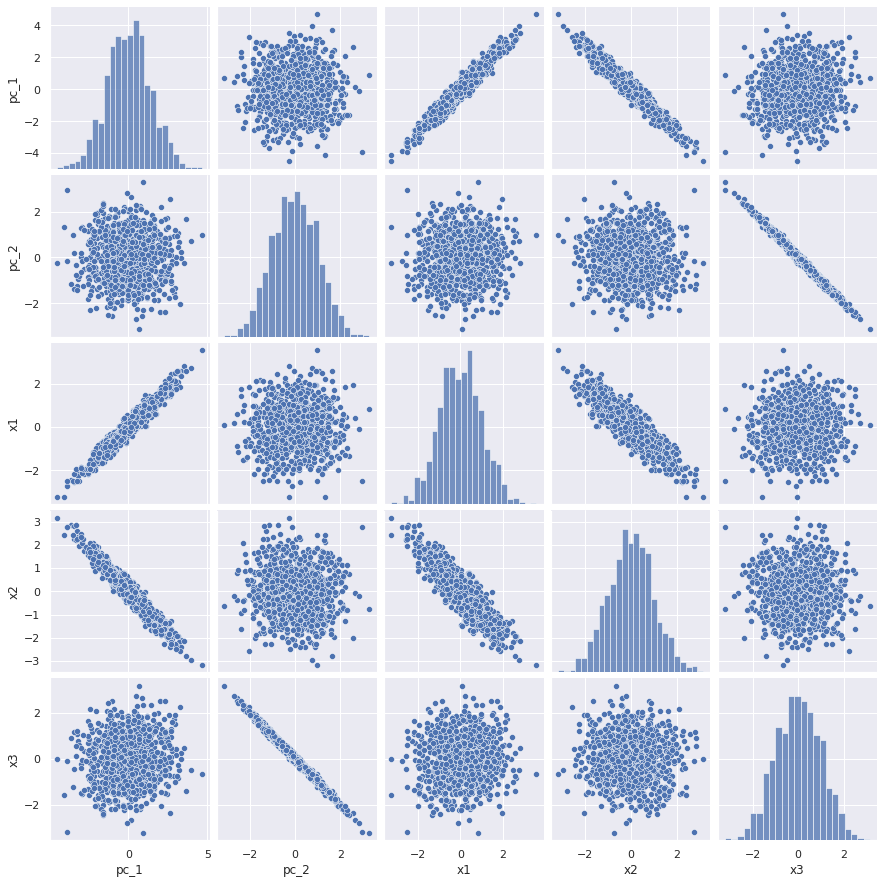

In [11]:
np.random.seed(7463)
n = 1000
c1 = np.random.normal(10,2,n)
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
pca_fun(x, n_components=2, normalize=True)

Ahora pc1 está más relacionado con 'x1' y 'x2' que con 'x3'. Estandarizando el valor o tamaño de la varianza 'x3' se redujo. Es importante que todo esté en unam isma escala, pues el algoritmo es susceptible a la varianza

### PCA cuando las variables tienen correlación

Matriz de Correlacion
          x1        x2
x1  1.000000  0.901158
x2  0.901158  1.000000 

Explained Variance:  [0.95058071]
Sum of Explained Variance:  0.9505807063283276


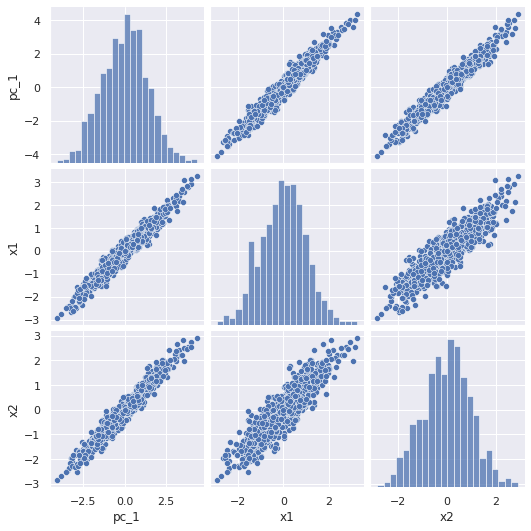

In [12]:
np.random.seed(7463)
n = 1000
mean = [0,0]
cov = np.array([[1,.9],
               [.9,1]])
x = np.random.multivariate_normal(mean, cov, n)
x = pd.DataFrame(x, columns=['x1','x2'])
print('Matriz de Correlacion')
print(x.corr(), '\n')

pca_fun(x=x, n_components=1)

Con variables con correlación lineal el primer componente explica el 95% de la varianza, mostrando que pc1 está muy relacionado a x1 y x2.

### PCA cuando las variables no tienen correlación

#### Dos variables

Matriz de Correlacion
          x1        x2
x1  1.000000  0.012764
x2  0.012764  1.000000 

Explained Variance:  [0.50706364]
Sum of Explained Variance:  0.507063638902168


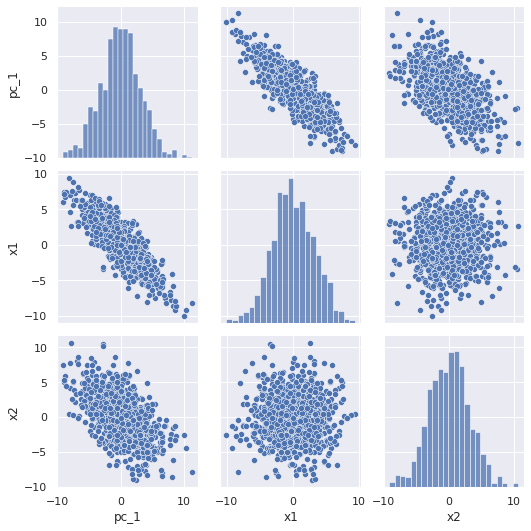

In [13]:
np.random.seed(7463)
n = 1000
mean = [0,0]
cov = np.array([[10,0],
               [0,10]])
x = np.random.multivariate_normal(mean, cov, n)
x = pd.DataFrame(x, columns=['x1','x2'])
print('Matriz de Correlacion')
print(x.corr(), '\n')

pca_fun(x=x, n_components=1)

Cada variable tiene varianza y media idéntica. Al no tener ninguna relación entre ellas, cada componente debe de explicar la mitad de la varianza aproximadamente.

#### Tres variables

Matriz de Correlacion
          x1        x2        x3
x1  1.000000 -0.003892  0.003338
x2 -0.003892  1.000000  0.030582
x3  0.003338  0.030582  1.000000 

Explained Variance:  [0.34598745 0.33983201 0.31418054]
Sum of Explained Variance:  1.0


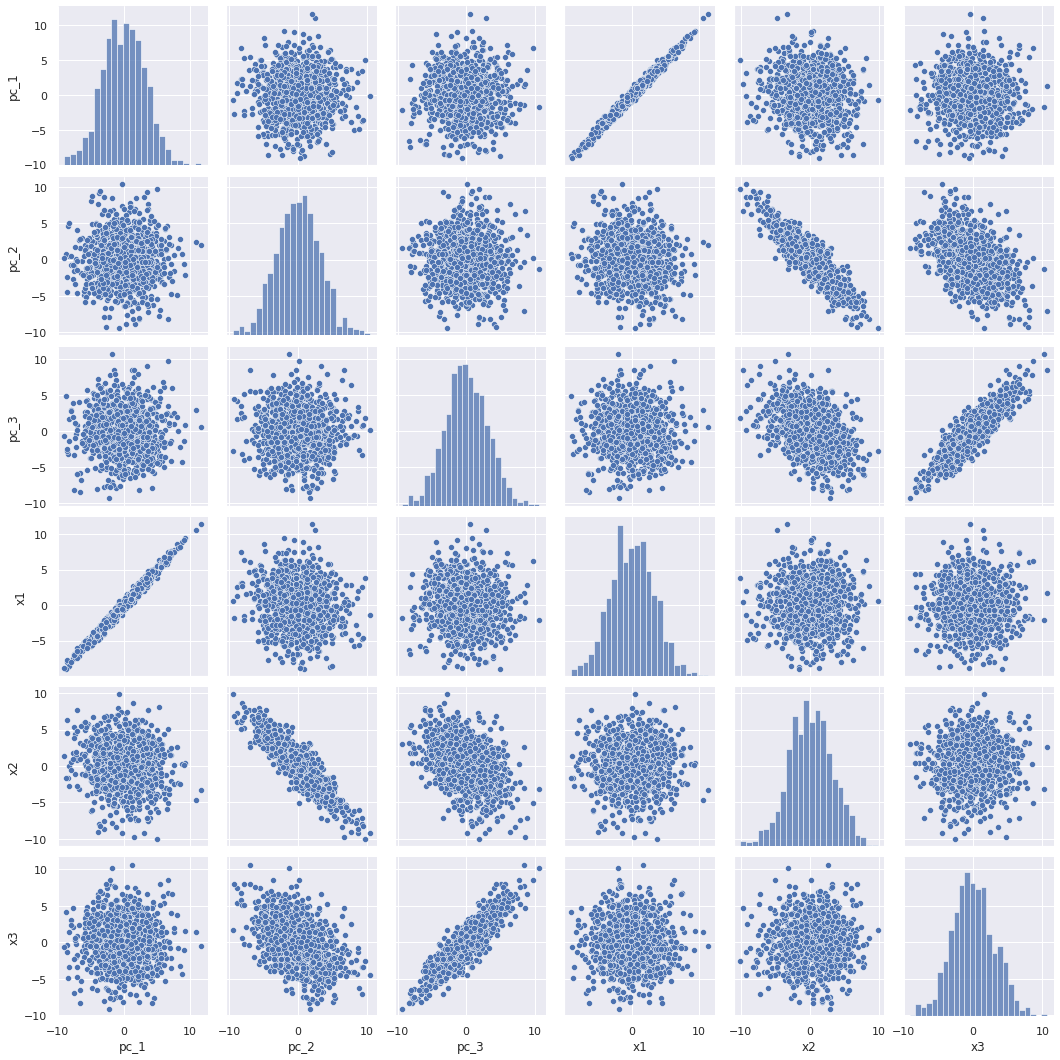

In [14]:
mean = [0, 0, 0]
cov = np.array([[10, 0, 0], 
                [0, 10,0],
                [0,0,10]])
x = cor_data(mean, cov)
pca_fun(x=x, n_components=3)


Cada componetne explica aproximadamente 33% de la varianza, porque ninguna variable se relaciona de dorma lineal. En este caso no se recomienda reducir la dimensionalidad.

### PCA con variables correlacionadas pero no de forma lineal

Explained Variance:  [0.50168205 0.49831795]
Sum of Explained Variance:  1.0


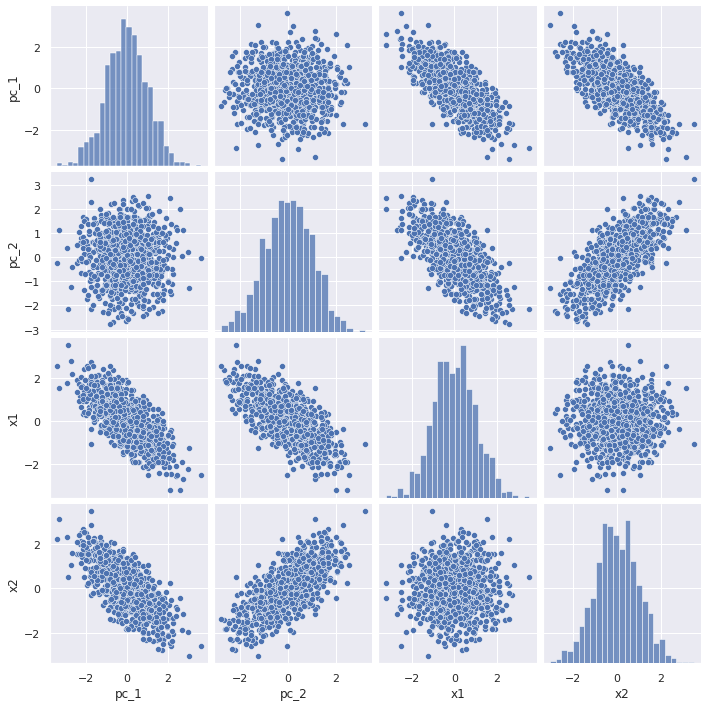

In [15]:
np.random.seed(7463)
n = 1000


c1 = np.random.normal(10,2,n)
# x1 se relaciona de forma lineal a c1
x1 = c1 + np.random.normal(0,1,n)
#x2 no se relaciona de forma lineal a c1 y por lo tanto tampoco a x1
x2 = -3*(1/c1) + np.random.normal(0,1,n)

x = pd.DataFrame.from_dict({'x1':x1,'x2':x2})

pca_fun(x=x, n_components=2, normalize=True)

Al no estar relacionadas de forma lineal cada componente explica aproximadamente la mitad de la varianza como en el caso anterior dodne las variables eran independientes.

En este caso tampoco de recomienda reducir dimensionalidad 

### PCA en el EDA

In [16]:
def glimpse_df(df):
  print('               Head              \n')
  print(df.head())
  print("\n  --------------------------- \n") 
  print('               Info              \n')
  print(df.info())
  print("\n  --------------------------- \n")
  print("              Describe           \n")
  print(df.describe())
  print("\n  --------------------------- \n")
  print("                NaN              \n")
  df_ = df[df.isna().any(axis=1)]
  print(df_)

Cargado de datos del dataset de iris

In [17]:
df = sns.load_dataset('iris')
glimpse_df(df)

               Head              

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

  --------------------------- 

               Info              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

  --------------------------- 

              Desc

Correlación de variables continuas

In [18]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Correlación de variables continuas agrupando por especie

In [19]:
df.groupby('species').corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

Correlaciones graficadas por especie

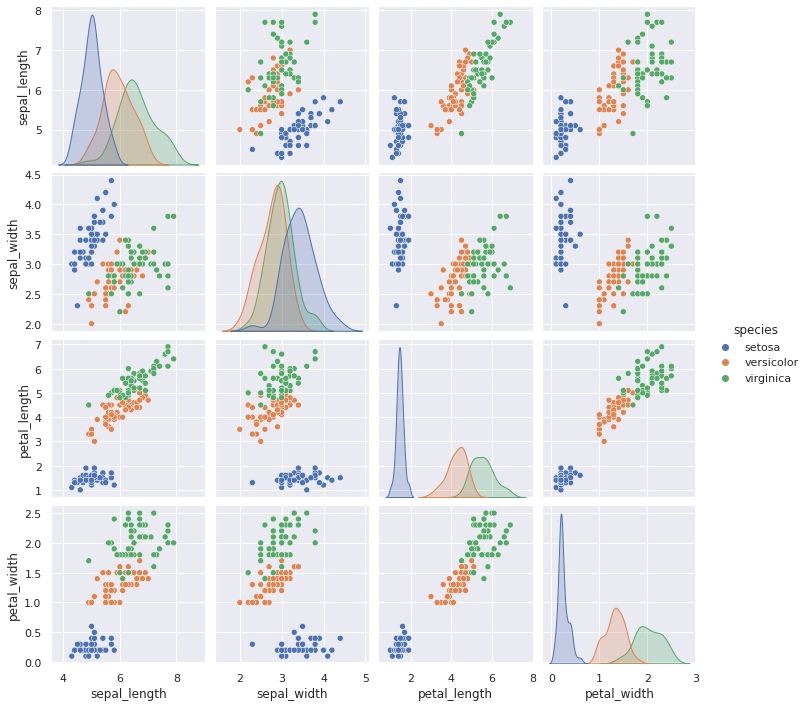

In [20]:
sns.pairplot(df, hue='species')

Realización del PCA

Explained Variance:  [0.72962445 0.22850762]
Sum of Explained Variance:  0.9581320720000164


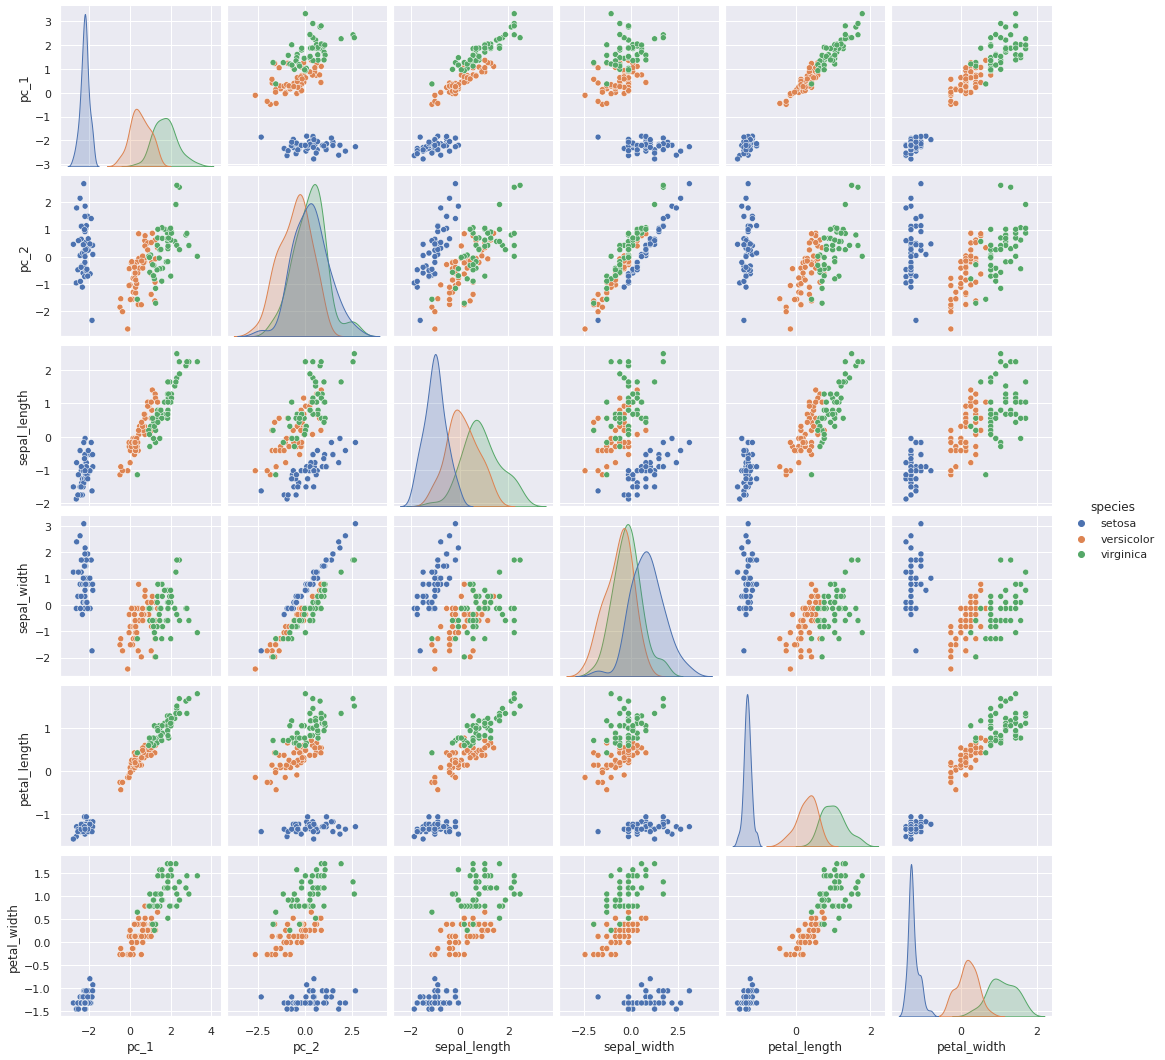

In [23]:

pca = PCA(n_components=2)

#Estandarización de x (variables continuas)
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
x_cols= x.columns
std_scale = StandardScaler().fit(x)
x = pd.DataFrame(std_scale.transform(x), columns=x_cols)

principal_components = pca.fit_transform(x)
pc_names = ['pc_{}'.format(a+1) for a in range(2)]


principal_df = pd.DataFrame(data = principal_components
             , columns = pc_names)

# Create visualizations
final_df = pd.concat([principal_df, x, df[['species']]], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(final_df, hue='species')

Al utilizar dos componentes se describiría el 95% de la varianza

### PCA aplicado a un modelo de clasificación

Un modelo de clasificacion de especies de nuestro set de datos Iris. Comparemos un clasificador logistico que utilize las 4 variables,y 1, 2 y 3 PCA para evaluar.

**Al momento de entrenar cualquier modelo el escalamiento y el PCA debe ser entrenado con los datos de Train, sin ver los datos del Test!**

In [24]:
# funcion que reciba los datos de train, los escale, y aplique PCA. Para despues aplicar las mismas transformaciones a los datos de test.

def pca_apply(x_train=pd.DataFrame(), x_test=pd.DataFrame(), n_c=1, normalize=False):

  pca = PCA(n_components=n_c)

  # Estandarización de x
  if normalize:
    x_cols= x_train.columns
    std_scale = StandardScaler().fit(x_train)
    x_train = pd.DataFrame(std_scale.transform(x_train), columns=x_cols)
    x_test = pd.DataFrame(std_scale.transform(x_test), columns=x_cols)

  # pca
  pca.fit(x_train)
  # Apply PCA a datos de entrenamiento y pruebas
  x_train_pc = pca.transform(x_train)
  x_test_pc = pca.transform(x_test)


  pc_names = ['pc_{}'.format(a+1) for a in range(n_c)]
  x_train_pc = pd.DataFrame(data = x_train_pc
             , columns = pc_names)
  x_test_pc = pd.DataFrame(data = x_test_pc
             , columns = pc_names)

  # valores de pca
  print('Explained Variance: ', pca.explained_variance_ratio_)
  print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

  return x_train_pc, x_test_pc

In [25]:
# Función para regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def log_regression(x_train, x_test, y_train, y_test):
  
  #print(x_train.columns)
  # Train Logistic Model
  model = LogisticRegression()
  model.fit(x_train, y_train)

  #Test the model
  predictions = model.predict(x_test)

  #Check precision, recall, f1-score
  #print( '\n', classification_report(y_test, predictions) )
  print( 'Accuracy: ', accuracy_score(y_test, predictions))
  #print('\n Coefficients: \n', model.coef_)
  print('----------------------------------------------------------------')

In [26]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns!='species']
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=27)


x_train_pc, x_test_pc = pca_apply(x_train, x_test, n_c=3, normalize=True)

print('\n Regresión logistica usando 1 variables-PC \n')
log_regression(x_train_pc[['pc_1']], x_test_pc[['pc_1']], 
               y_train, y_test)

print('\n Regresión logistica usando 2 variables-PC \n')
log_regression(x_train_pc[['pc_1', 'pc_2']], x_test_pc[['pc_1', 'pc_2']],
               y_train, y_test)

print('\n Regresión logistica usando 3 variables-PC \n')
log_regression(x_train_pc[['pc_1', 'pc_2', 'pc_3']], 
               x_test_pc[['pc_1', 'pc_2','pc_3']],
               y_train, y_test)

print('\n Regresión logistica usando las 4 variables Originales \n')
log_regression(x_train, x_test, y_train, y_test)


print('\n Regresión logistica usando solo el tamanno de los Sepalos \n')
log_regression(x_train[['sepal_length']], x_test[['sepal_length']],
               y_train, y_test)

Explained Variance:  [0.73917151 0.22163425 0.03422292]
Sum of Explained Variance:  0.995028680493228

 Regresión logistica usando 1 variables-PC 

Accuracy:  0.9333333333333333
----------------------------------------------------------------

 Regresión logistica usando 2 variables-PC 

Accuracy:  0.9333333333333333
----------------------------------------------------------------

 Regresión logistica usando 3 variables-PC 

Accuracy:  0.9
----------------------------------------------------------------

 Regresión logistica usando las 4 variables Originales 

Accuracy:  0.9333333333333333
----------------------------------------------------------------

 Regresión logistica usando solo el tamanno de los Sepalos 

Accuracy:  0.7666666666666667
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


El Accuracy es el mismo con PCA de 1 y dos componentes que usando las 4 variables originales. Para este caso es posible reducir la dimensionalidad de 4 variables a 1 o 2.